In [4]:
import panel as pn

Column
    [0] Markdown(str, style={'font-size': '30px', ...})
    [1] Tabs
        [0] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure)
        [1] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure)
        [2] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure)
        [3] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure)
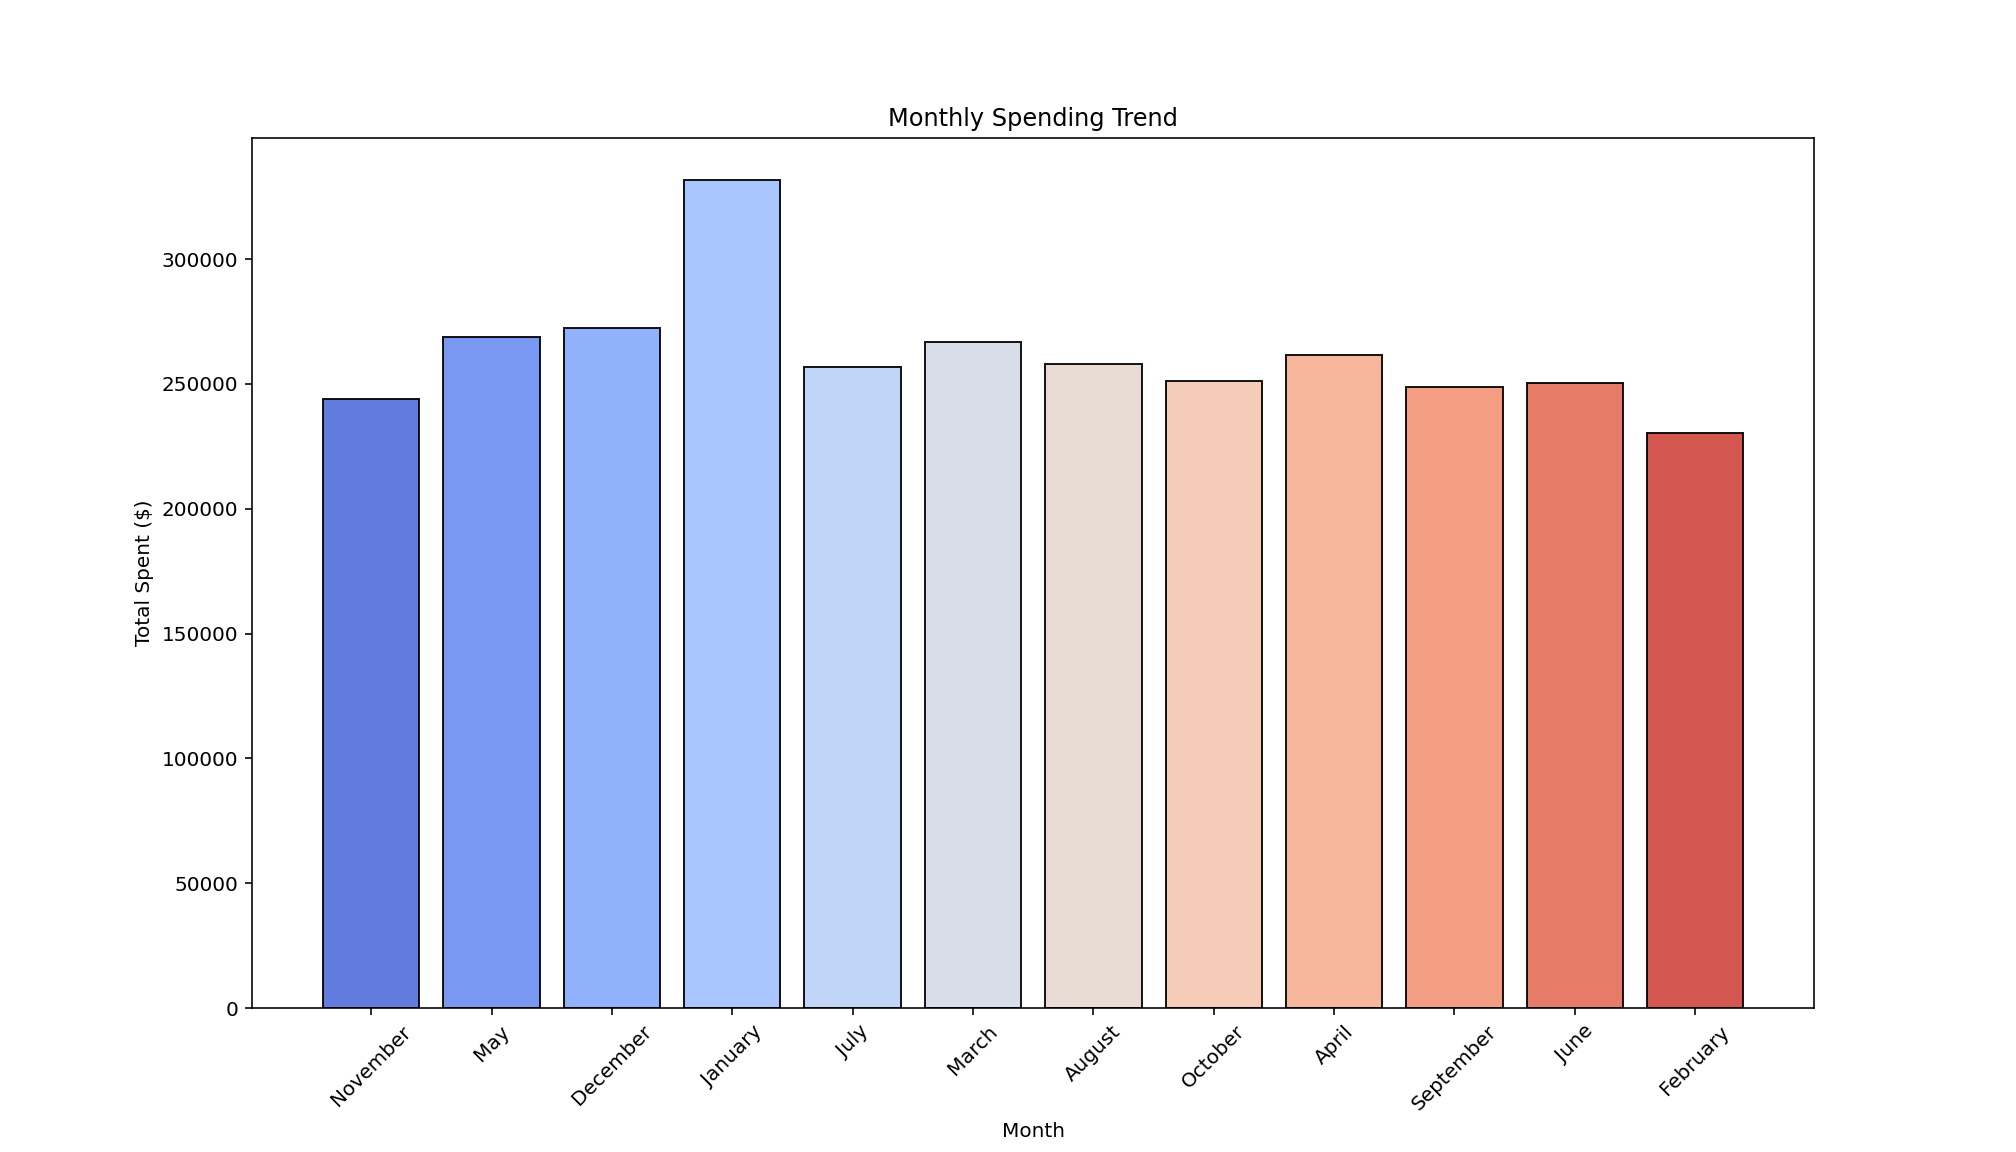
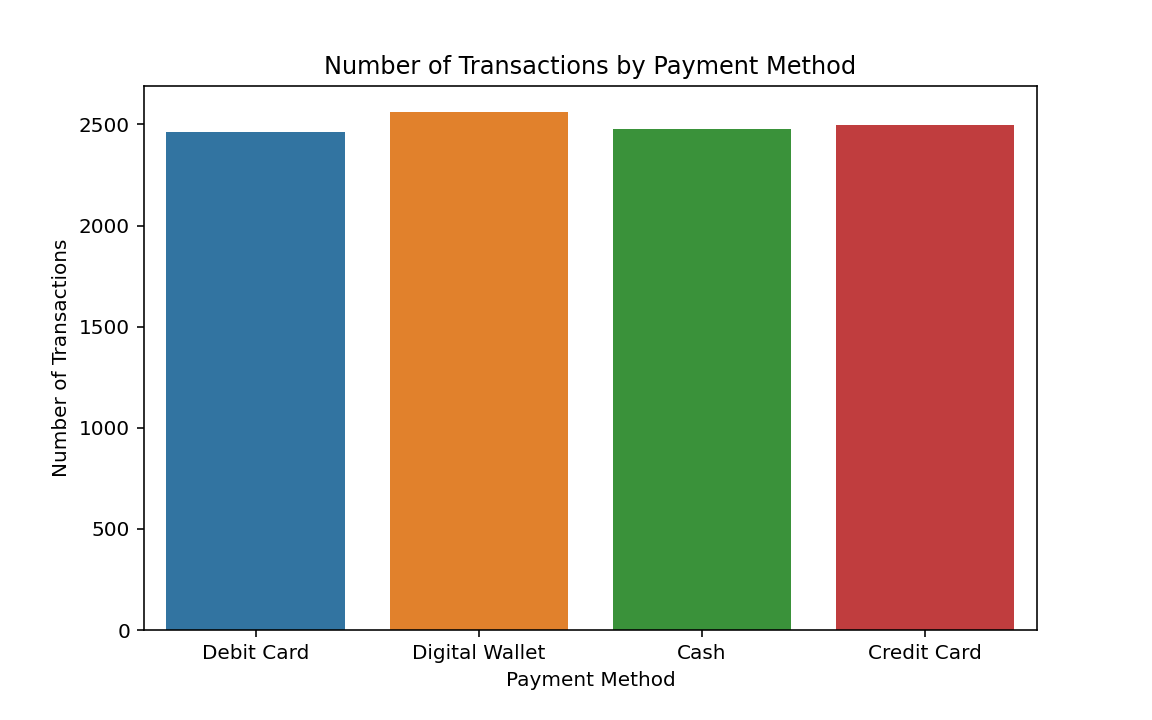
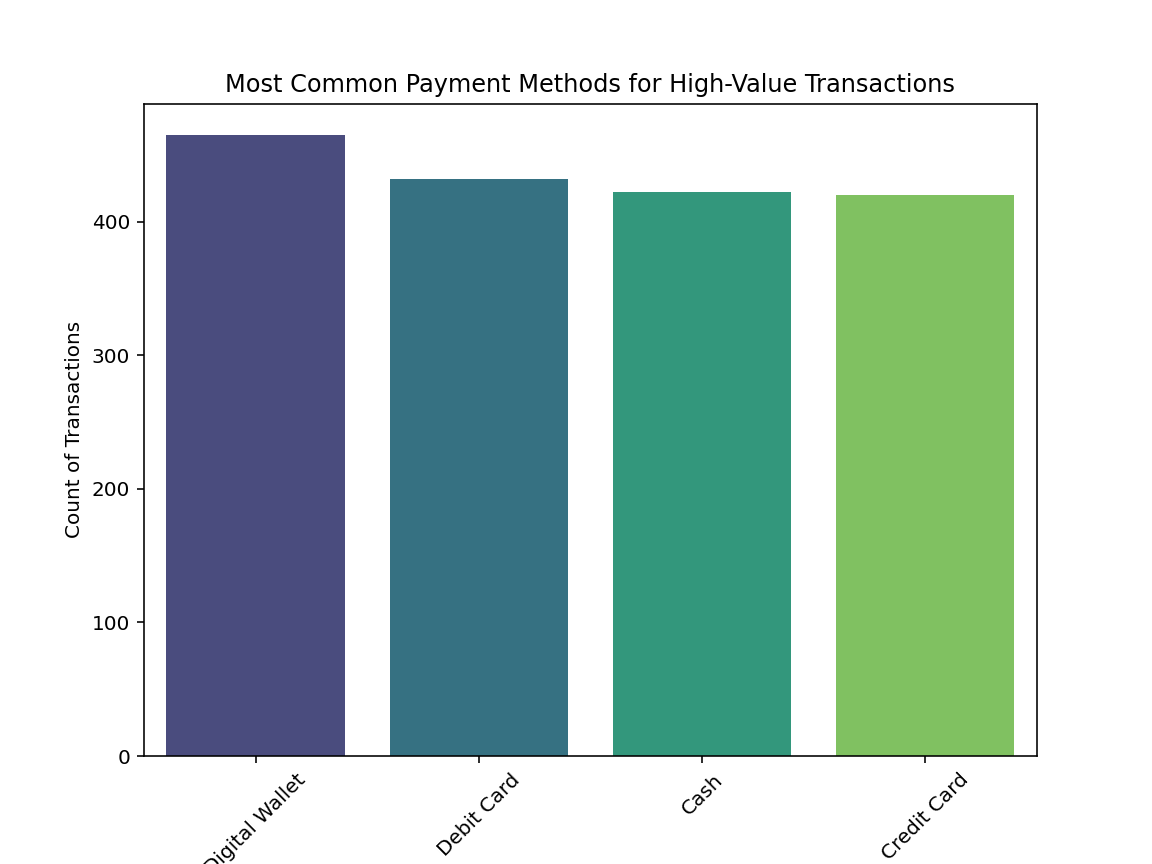
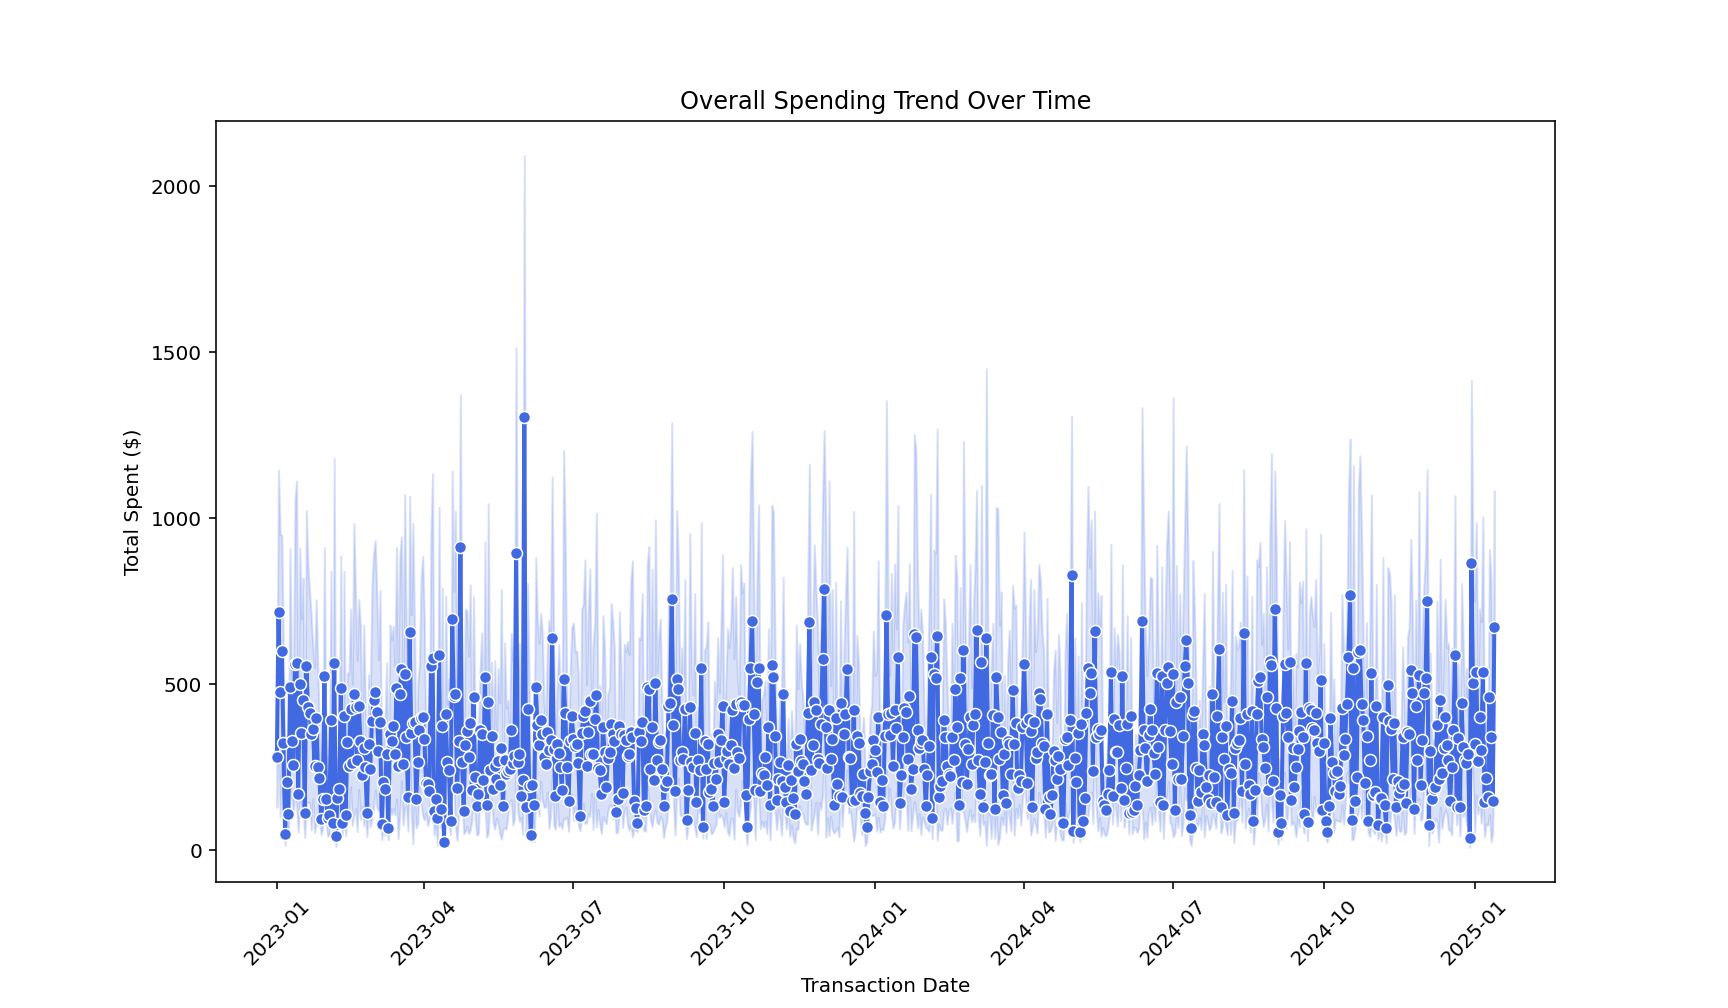

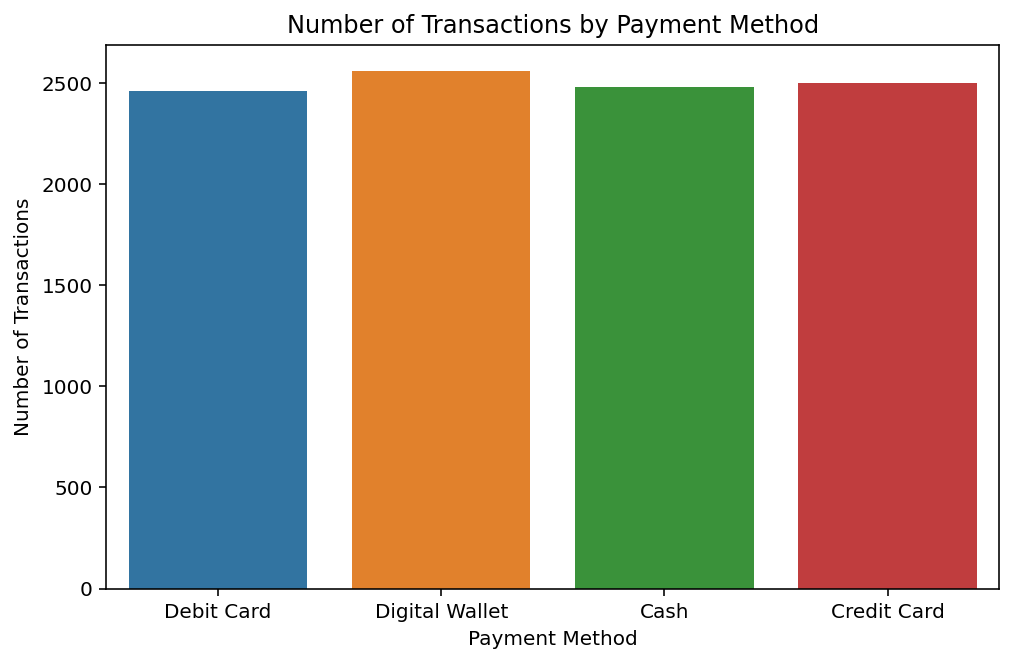

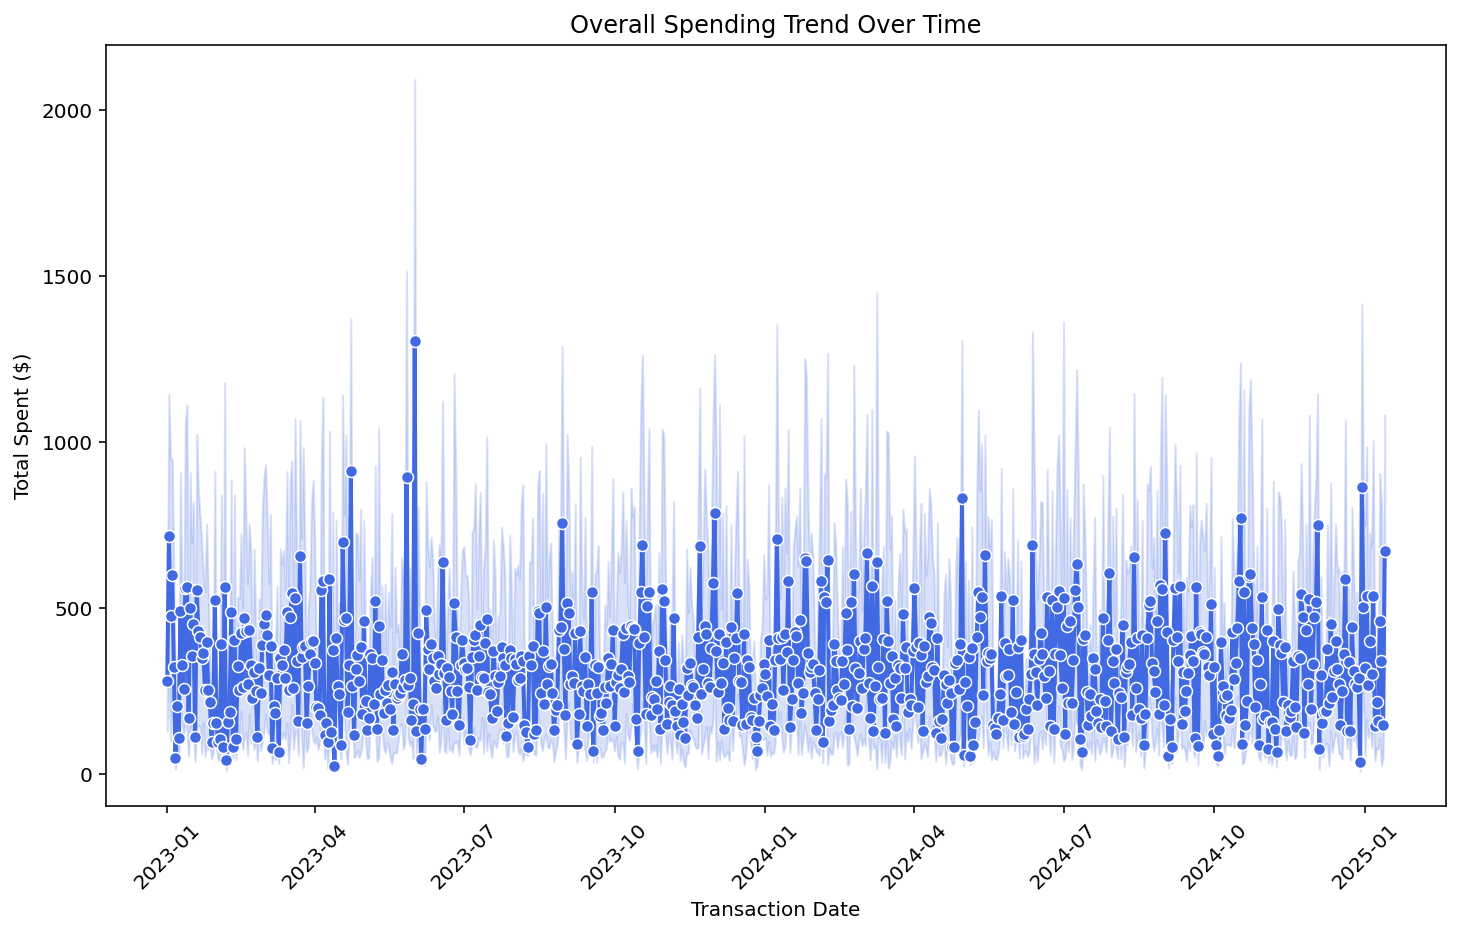

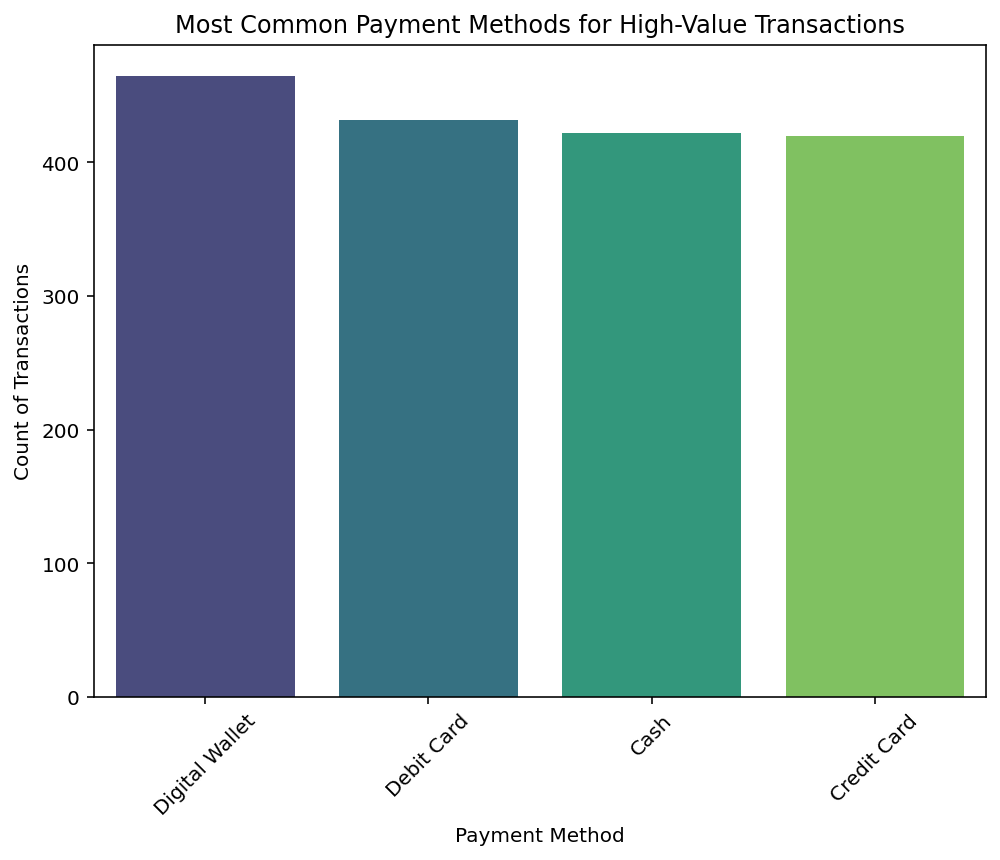

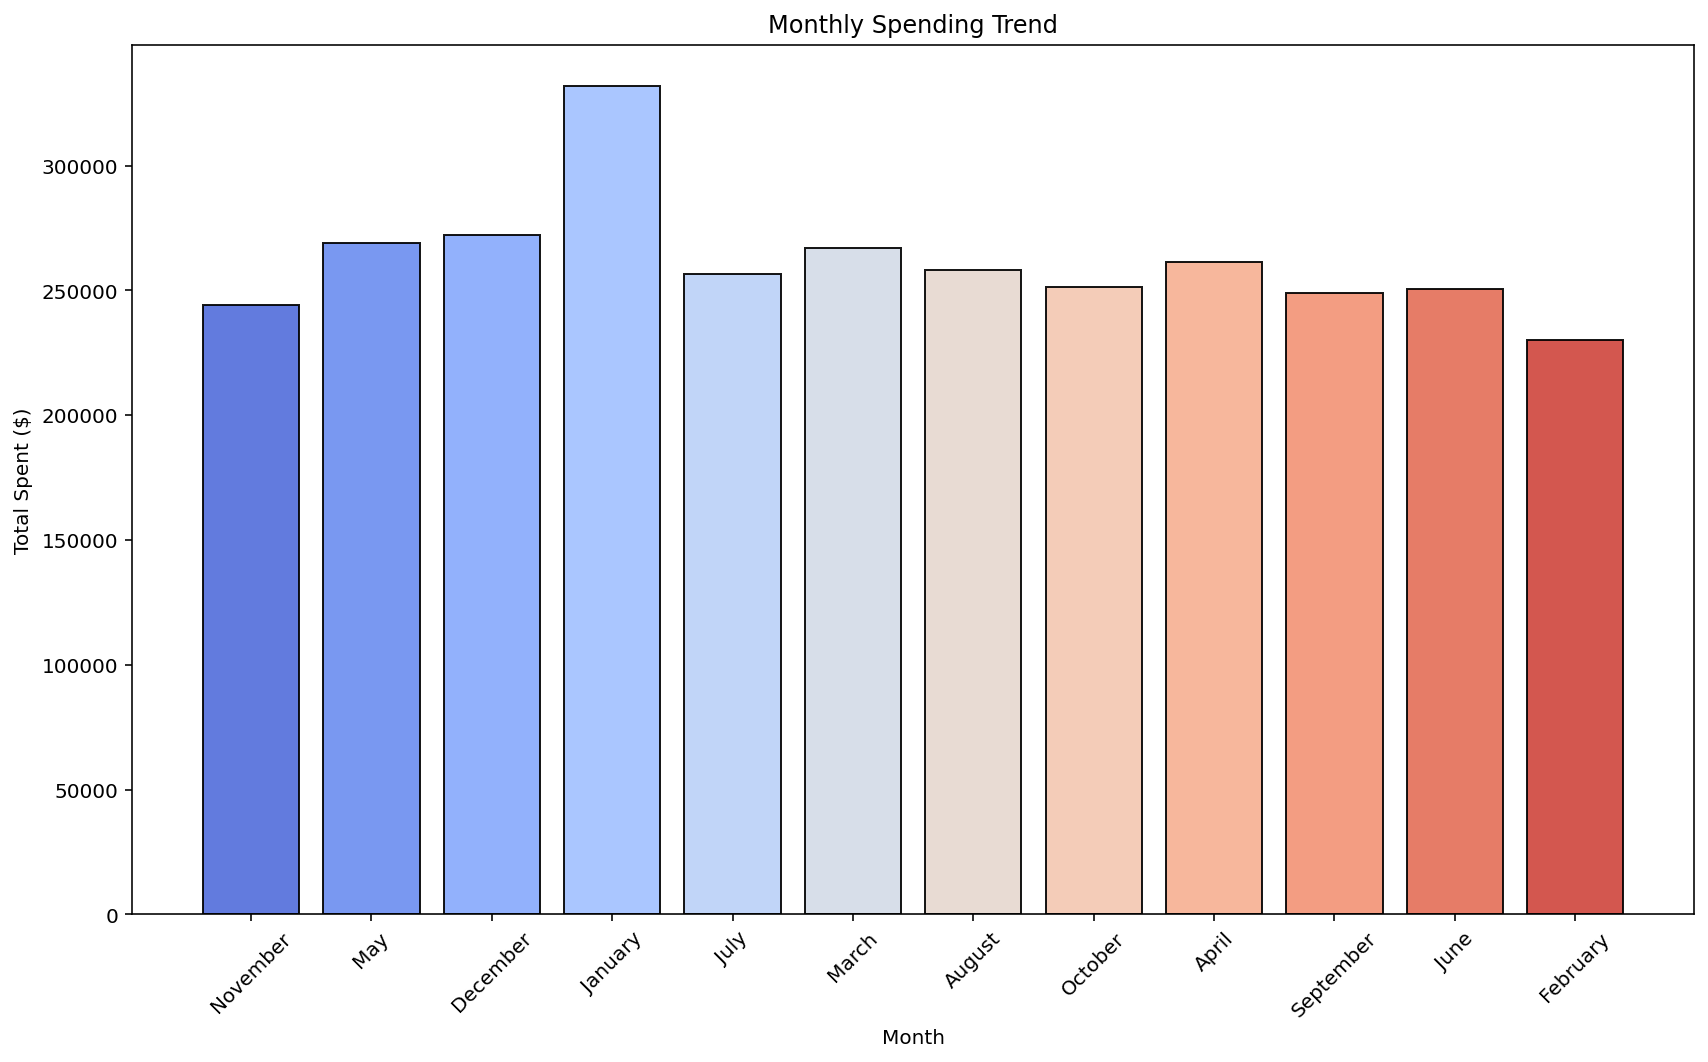

In [6]:
import panel as pn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import panel as pn
pn.extension()

# Load your data (ensure this path is correct)
data = pd.read_csv(r"C:\Users\17086\Downloads\archive (2)\spndng_pattrn.csv")

# Data Cleaning Process
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])
data['Category'] = data['Category'].str.lower()
data['Total Spent'] = np.clip(data['Total Spent'], data['Total Spent'].quantile(0.05), data['Total Spent'].quantile(0.95))
data['Price Per Unit'] = np.clip(data['Price Per Unit'], data['Price Per Unit'].quantile(0.05), data['Price Per Unit'].quantile(0.95))

# Creating Plots for the Dashboard

# Plot 1: Number of Transactions by Payment Method
def plot_payment_method():
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Payment Method', data=data)
    plt.title('Number of Transactions by Payment Method')
    plt.xlabel('Payment Method')
    plt.ylabel('Number of Transactions')
    return pn.pane.Matplotlib(plt.gcf())

# Plot 2: Overall Spending Trend Over Time
def plot_spending_trend():
    plt.figure(figsize=(12, 7))
    sns.lineplot(x='Transaction Date', y='Total Spent', data=data, marker='o', color='royalblue', linewidth=2)
    plt.title('Overall Spending Trend Over Time')
    plt.xlabel('Transaction Date')
    plt.ylabel('Total Spent ($)')
    plt.xticks(rotation=45)
    return pn.pane.Matplotlib(plt.gcf())

# Plot 3: Most Common Payment Methods for High-Value Transactions
def plot_high_value_payment_methods():
    high_value_transactions = data[data["Total Spent"] > 500]
    payment_method_counts = high_value_transactions["Payment Method"].value_counts()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette="viridis")
    plt.title("Most Common Payment Methods for High-Value Transactions")
    plt.xlabel("Payment Method")
    plt.ylabel("Count of Transactions")
    plt.xticks(rotation=45)
    return pn.pane.Matplotlib(plt.gcf())

# Plot 4: Monthly Spending Trend
def plot_monthly_spending():
    data['Month'] = data['Transaction Date'].dt.month_name()
    monthly_spending = data.groupby('Month', sort=False)['Total Spent'].sum()
    plt.figure(figsize=(14, 8))
    colors = sns.color_palette("coolwarm", len(monthly_spending))
    bars = plt.bar(monthly_spending.index, monthly_spending.values, color=colors, edgecolor="black", alpha=0.9)
    plt.title('Monthly Spending Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Spent ($)')
    plt.xticks(rotation=45)
    return pn.pane.Matplotlib(plt.gcf())

# Create Panel Layout

# Header Section
header = pn.pane.Markdown("# Customer Spending Insights Dashboard", style={'font-size': '30px', 'text-align': 'center'})

# Create tabs for different sections
tabs = pn.Tabs(
    ('General Insights', plot_payment_method),
    ('Spending Trend', plot_spending_trend),
    ('High-Value Transactions', plot_high_value_payment_methods),
    ('Monthly Spending', plot_monthly_spending),
)

# Combine everything into a layout
layout = pn.Column(header, tabs)

# Serve the dashboard
layout.servable()
